# Trabalho 1
### VICTOR ANDRÉ DE MORAES - 211026664
### THIAGO CARRIJO RUFINO RABELO - 211068350

## Imports Libs

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import MeanSquaredError, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


2024-12-03 22:40:06.106042: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733276406.167372   10107 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733276406.184152   10107 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 22:40:06.328774: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Prepare data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## Set Models

### 2.a Perceptron with Logistic Activation, SSE Cost, Gradient Descent

In [12]:
model_2a = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='sigmoid')
])
model_2a.compile(optimizer=SGD(), loss=MeanSquaredError(), metrics=['accuracy'])

model_2a_over_epochs = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='sigmoid')
])
model_2a_over_epochs.compile(optimizer=SGD(), loss=MeanSquaredError(), metrics=['accuracy'])

### 2.b Softmax Output and Cross-Entropy Loss

In [4]:
model_2b = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])
model_2b.compile(optimizer=SGD(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

### 2.c Adam Optimizer

In [5]:
model_2c = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])
model_2c.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

### 2.d ReLU Activation

In [6]:
model_2d = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_2d.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

### 2e) Larger Networks

##### Single Hidden Layer with 256 Neurons

In [7]:
model_2e_1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model_2e_1.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

##### Two Hidden Layers with 256 Neurons

In [8]:
model_2e_2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_2e_2.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [9]:
def plot_history(history, model_id, epochs_10=False):
    plt.title(f'Model {model_id}')
    plt.plot(history.history['accuracy'][:10] if epochs_10 else history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'][:10] if epochs_10 else history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    plt.title(f'Model {model_id}')
    plt.plot(history.history['loss'][:10] if epochs_10 else history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'][:10] if epochs_10 else history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## Training

#### Model 2a

In [13]:
history_2a = model_2a.fit(x_train, to_categorical(y_train), validation_data=(x_test, to_categorical(y_test)), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1254 - loss: 0.1493 - val_accuracy: 0.1647 - val_loss: 0.0914
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1940 - loss: 0.0905 - val_accuracy: 0.2382 - val_loss: 0.0892
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2572 - loss: 0.0890 - val_accuracy: 0.2863 - val_loss: 0.0885
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3047 - loss: 0.0883 - val_accuracy: 0.3349 - val_loss: 0.0880
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3519 - loss: 0.0878 - val_accuracy: 0.3636 - val_loss: 0.0874
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3781 - loss: 0.0872 - val_accuracy: 0.3773 - val_loss: 0.0869
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3900 - loss: 0.0867 - val_accuracy: 0.3953 - val_loss: 0.0863
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4030 - loss: 0.0861 - val_accuracy: 0.

In [14]:
history_2a_over_epochs = model_2a_over_epochs.fit(x_train, to_categorical(y_train), validation_data=(x_test, to_categorical(y_test)), epochs=60, batch_size=64)

Epoch 1/60
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1173 - loss: 0.1491 - val_accuracy: 0.2142 - val_loss: 0.0915
Epoch 2/60
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2369 - loss: 0.0907 - val_accuracy: 0.2809 - val_loss: 0.0893
Epoch 3/60
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2841 - loss: 0.0891 - val_accuracy: 0.3125 - val_loss: 0.0885
Epoch 4/60
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3117 - loss: 0.0884 - val_accuracy: 0.3357 - val_loss: 0.0880
Epoch 5/60
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3311 - loss: 0.0879 - val_accuracy: 0.3525 - val_loss: 0.0874
Epoch 6/60
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3481 - loss: 0.0872 - val_accuracy: 0.3723 - val_loss: 0.0868
Epoch 7/60
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3654 - loss: 0.0867 - val_accuracy: 0.3830 - val_loss: 0.0861
Epoch 8/60
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3729 - loss: 0.0860 - val_accuracy: 0.

#### Model 2a analysis


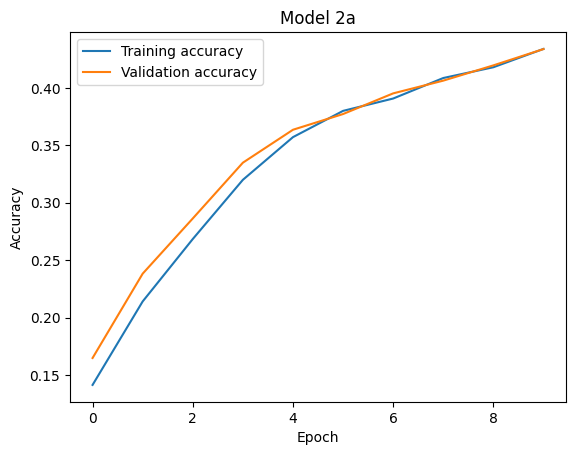

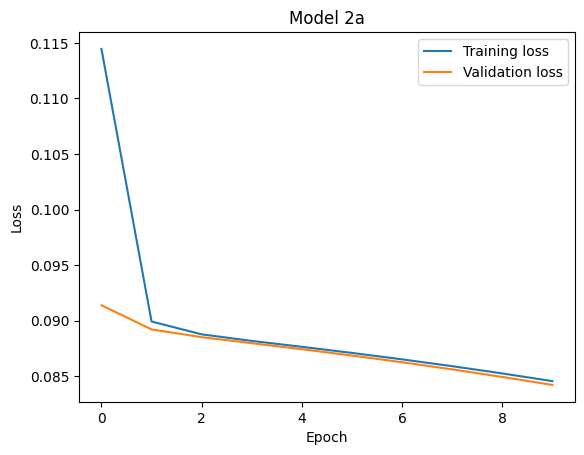

In [15]:
plot_history(history_2a, '2a')

According to the plot, the model still didn't converge yet. While the training accuracy is increasing and the training loss is decreasing, the validation is following a similar pattern. Moreover, in order to test if the model would converge, it was raised the number of epochs from 10 to 60 to allow the model to converge.

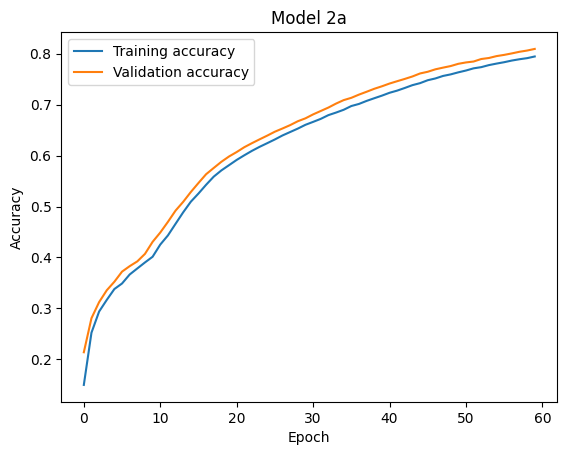

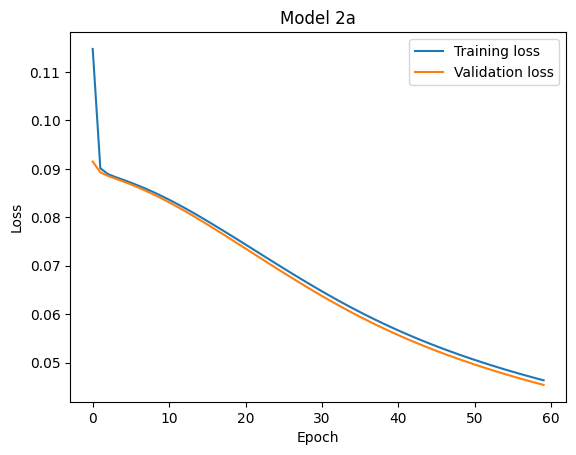

In [16]:
plot_history(history_2a_over_epochs, '2a')

After checking the model trained over 60 epochs, it can be concluded that maybe an increase in the learning rate would help it converge more rapidly. Furthermore, the model still doesn't look like it converged yet (training and validation are really similar and it still doesn't look like it's stuck). Maybe testing on another dataset would determine if this logic holds true.

#### Model 2b

In [17]:
history_2b = model_2b.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4649 - loss: 2.0431 - val_accuracy: 0.7922 - val_loss: 1.3341
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7973 - loss: 1.2016 - val_accuracy: 0.8373 - val_loss: 0.8640
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8388 - loss: 0.8205 - val_accuracy: 0.8610 - val_loss: 0.6653
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8545 - loss: 0.6572 - val_accuracy: 0.8726 - val_loss: 0.5615
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8656 - loss: 0.5691 - val_accuracy: 0.8824 - val_loss: 0.4995
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8784 - loss: 0.5018 - val_accuracy: 0.8887 - val_loss: 0.4577
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8835 - loss: 0.4639 - val_accuracy: 0.8922 - val_loss: 0.4277
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8850 - loss: 0.4390 - val_accuracy: 0.

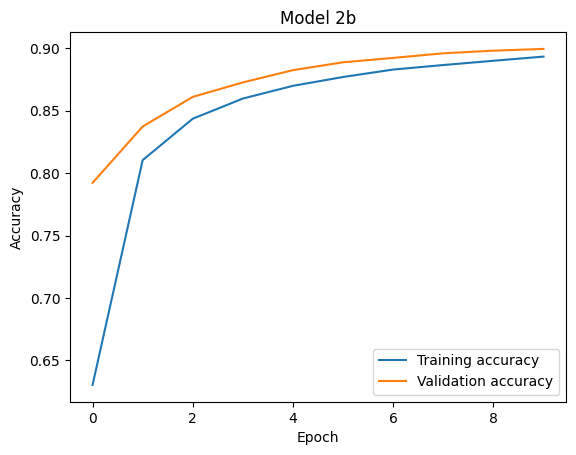

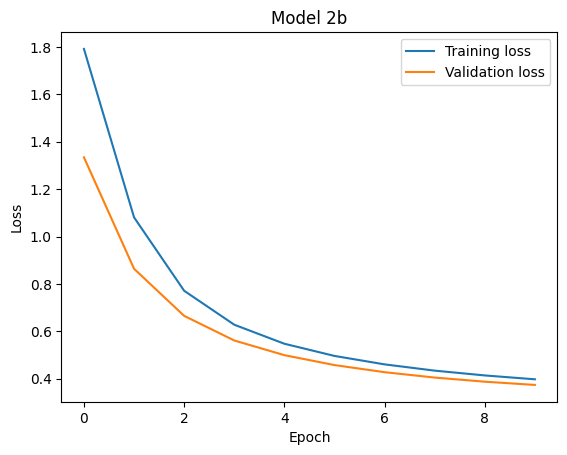

In [18]:
plot_history(history_2b, '2b')

According to the plot, the model perhaps has finished converging. While the training accuracy is increasing and the training loss is decreasing, the validation is following a similar pattern (and the slope of the tangent line at the end seems to approach zero).

#### Model 2c

In [19]:
history_2c = model_2c.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8165 - loss: 0.7836 - val_accuracy: 0.9252 - val_loss: 0.2624
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9304 - loss: 0.2457 - val_accuracy: 0.9445 - val_loss: 0.1939
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9477 - loss: 0.1812 - val_accuracy: 0.9526 - val_loss: 0.1612
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9578 - loss: 0.1487 - val_accuracy: 0.9591 - val_loss: 0.1384
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9653 - loss: 0.1229 - val_accuracy: 0.9646 - val_loss: 0.1212
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9703 - loss: 0.1042 - val_accuracy: 0.9665 - val_loss: 0.1114
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9766 - loss: 0.0856 - val_accuracy: 0.9703 - val_loss: 0.0989
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9795 - loss: 0.0737 - val_accuracy: 0.

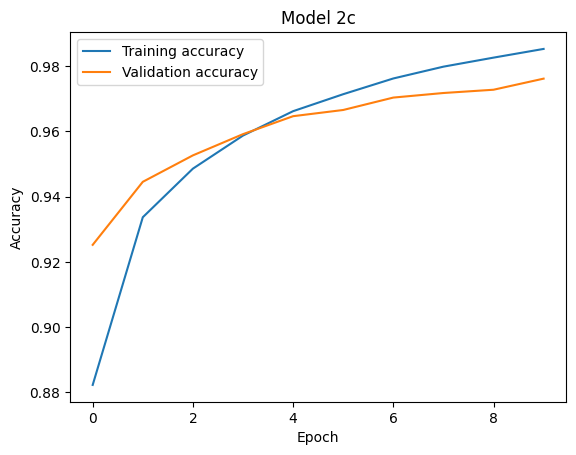

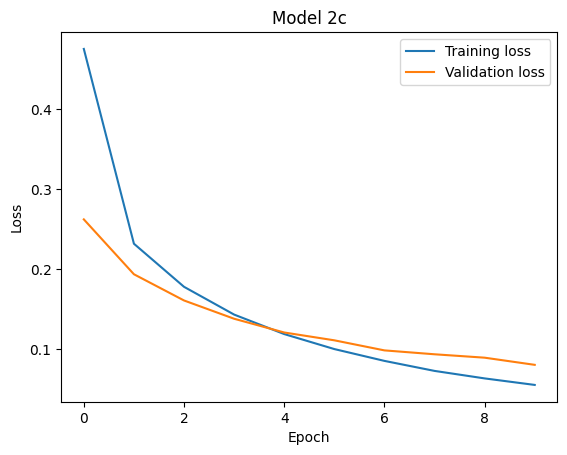

In [20]:
plot_history(history_2c, '2c')

The plot above of the first 10 epochs shows that the models may be starting to overfit, but it cannot be concluded yet, since the difference between accuracy and loss from training and validation are very small (less than 1%). To test if it will suffer from this problem, it can be trained for more epochs. However, even if it is going to overfit on future epochs, for this current epoch, it's a great model.

#### Model 2d

In [21]:
history_2d = model_2d.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
914/938 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8576 - loss: 0.5107

2024-12-03 22:45:27.548179: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_102', 4 bytes spill stores, 4 bytes spill loads



938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8591 - loss: 0.5051 - val_accuracy: 0.9525 - val_loss: 0.1609
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9574 - loss: 0.1456 - val_accuracy: 0.9663 - val_loss: 0.1131
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9731 - loss: 0.0920 - val_accuracy: 0.9748 - val_loss: 0.0893
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9801 - loss: 0.0705 - val_accuracy: 0.9751 - val_loss: 0.0815
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9842 - loss: 0.0552 - val_accuracy: 0.9766 - val_loss: 0.0768
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9877 - loss: 0.0424 - val_accuracy: 0.9766 - val_loss: 0.0768
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9902 - loss: 0.0342 - val_accuracy: 0.9775 - val_loss: 0.0720
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9927 - loss: 0.0258 - val_accuracy: 0.9752 - val_

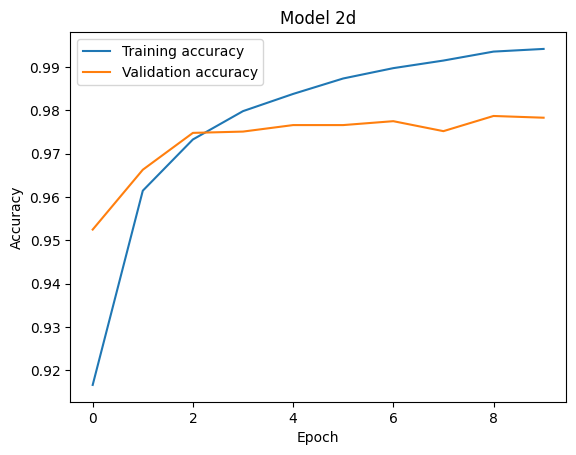

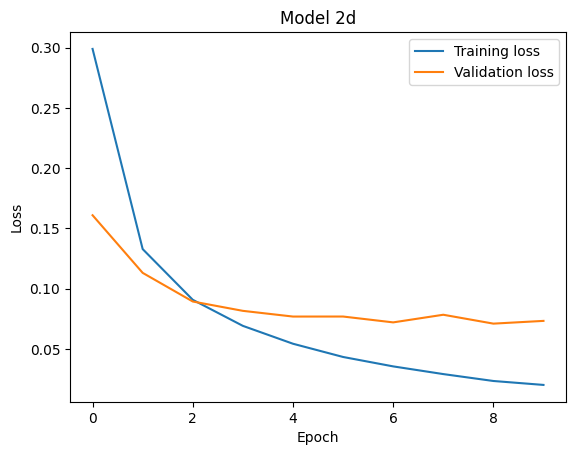

In [22]:
plot_history(history_2d, '2d')

The plot above has a similar analysis as the model 2c, because the validation is being left behind by the training, but the difference is too small to be considered overfitting. However, it's possible to conclude that the model from the epochs between 2 and 4 are probably better than the current one, since it's only getting better on identifying the patterns from training, and not from a general perspective.

#### Model 2e.1

In [23]:
history_2e_1 = model_2e_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8724 - loss: 0.4450 - val_accuracy: 0.9611 - val_loss: 0.1302
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9654 - loss: 0.1201 - val_accuracy: 0.9711 - val_loss: 0.0938
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9788 - loss: 0.0733 - val_accuracy: 0.9730 - val_loss: 0.0862
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9839 - loss: 0.0547 - val_accuracy: 0.9772 - val_loss: 0.0745
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9875 - loss: 0.0402 - val_accuracy: 0.9775 - val_loss: 0.0703
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9918 - loss: 0.0276 - val_accuracy: 0.9799 - val_loss: 0.0633
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9940 - loss: 0.0219 - val_accuracy: 0.9795 - val_loss: 0.0701
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9963 - loss: 0.0146 - val_accuracy: 0.

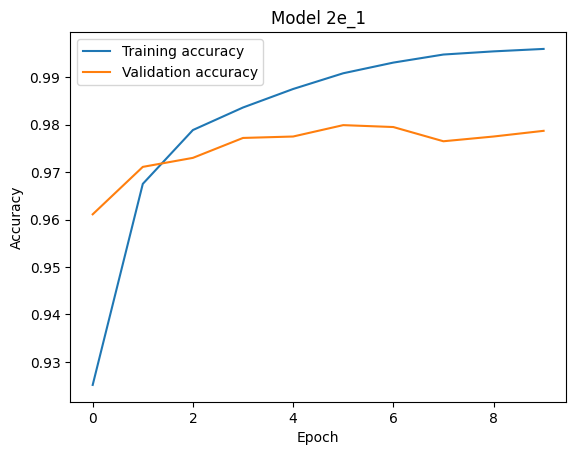

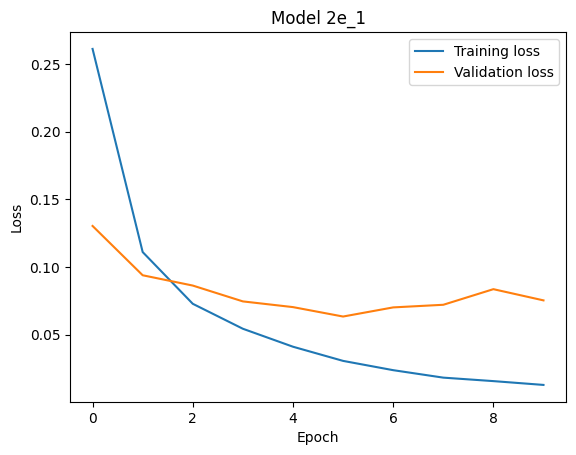

In [24]:
plot_history(history_2e_1, '2e_1')

The plot above has a similar analysis as the model 2c, because the validation is being left behind by the training, and the difference might suggests an overfitting. However, it's possible to conclude that the model from the epochs between 2 and 3 are probably better than the current one, since the current one is only getting better on identifying the patterns from training, and not from a general perspective (doesn't improve very much validation data).

#### Model 2e.2

In [25]:
history_2e_2 = model_2e_2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8586 - loss: 0.4977 - val_accuracy: 0.9599 - val_loss: 0.1296
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9644 - loss: 0.1159 - val_accuracy: 0.9699 - val_loss: 0.0958
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9775 - loss: 0.0744 - val_accuracy: 0.9758 - val_loss: 0.0773
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9837 - loss: 0.0539 - val_accuracy: 0.9758 - val_loss: 0.0815
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9875 - loss: 0.0420 - val_accuracy: 0.9771 - val_loss: 0.0761
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9891 - loss: 0.0338 - val_accuracy: 0.9779 - val_loss: 0.0741
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9912 - loss: 0.0284 - val_accuracy: 0.9777 - val_loss: 0.0793
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9918 - loss: 0.0259 - val_accuracy: 0.

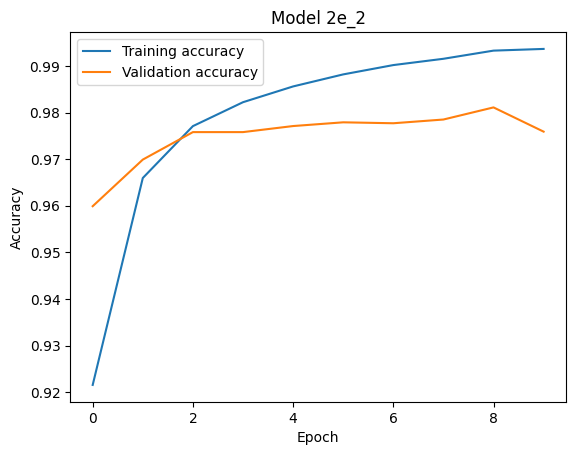

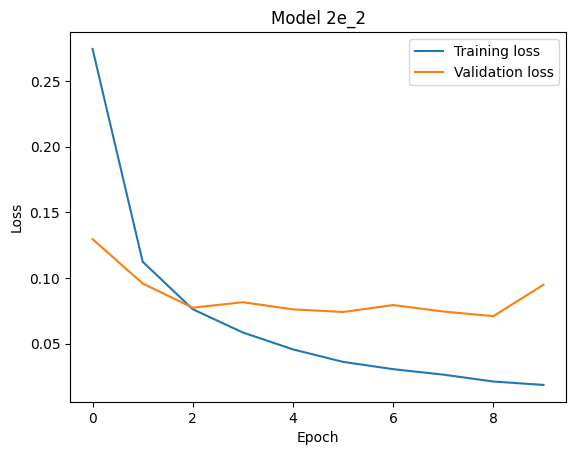

In [26]:
plot_history(history_2e_2, '2e_2')

The plot above has a similar analysis as the model 2c, because the validation is being left behind by the training, so it could be an overfitting. However, it's possible to conclude that the model from the fifth or sixth epoch is probably better than the current one, since the current on is only getting better on identifying the patterns from training, and not from a general perspective (best validation state in on fifth or sixth epoch, although since the second epoch, validation hasn't improved much).

## Visualization functions

In [27]:
def visualize_misclassified(model, x_data, y_data, num_samples=5):
    predictions = np.argmax(model.predict(x_data), axis=1)
    incorrect = np.where(predictions != y_data)[0]
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(incorrect[:num_samples]):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_data[idx], cmap='gray')
        plt.title(f"Pred: {predictions[idx]}, True: {y_data[idx]}")
        plt.axis('off')
    plt.show()

In [28]:
def confusion_matrix_generator(model):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(conf_matrix, display_labels=range(10)).plot(cmap='Blues', xticks_rotation=45)
    plt.show()

## Results

model_2a
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


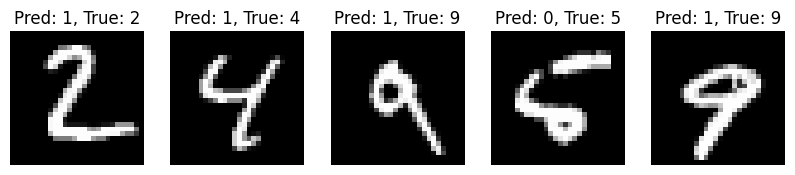

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step


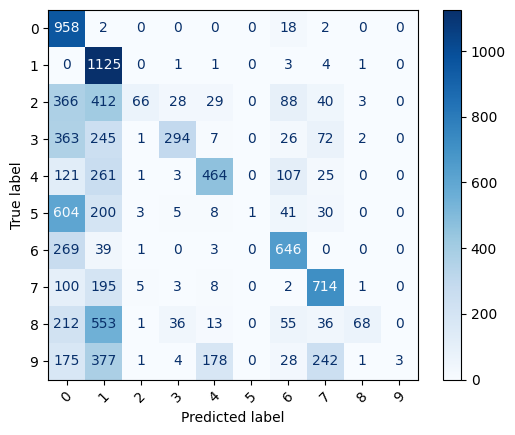

In [29]:
print("model_2a")
visualize_misclassified(model_2a, x_test, y_test)
confusion_matrix_generator(model_2a)

As it was said about the model 2a, the confusion matrix clearly shows that the model has not converged. Moreover, it doesn't recognize 2s and 5, and it tends to guess 1, which can concluded by the sum of all the predicted ones in the matrix.

Furthermore, it can be explained why it doesn't recognize any 5 by the activation function being the sigmoide, since the average value of the function is 0. Therefore, the sigmoid function as the activation of the last layer isn't a great idea.

model_2a_over_epochs
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


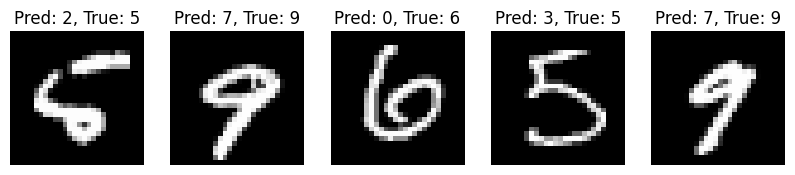

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step


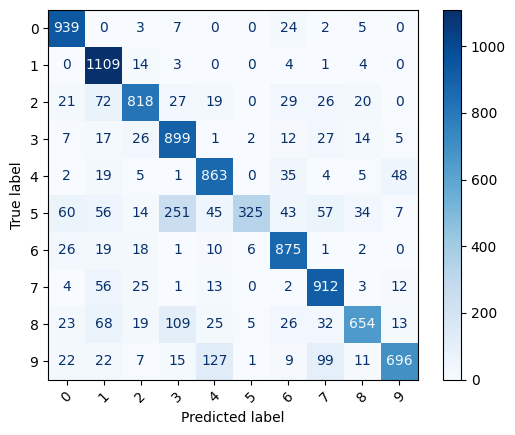

In [35]:
print("model_2a_over_epochs")
visualize_misclassified(model_2a_over_epochs, x_test, y_test)
confusion_matrix_generator(model_2a_over_epochs)

The confusion matrix shows that the model has predicted a small quantity of fives and was leaning towards three. So, it still has some difficulty predicting fives, as expected.Moreover, the miss classified images are easy to identify, proving the bad performance by the model.

model_2b
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


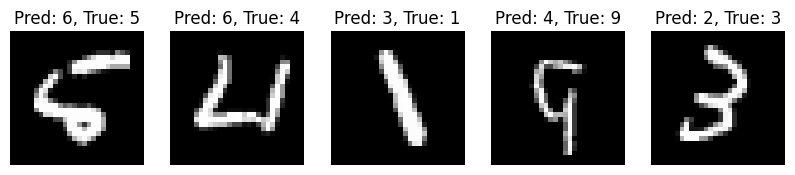

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step


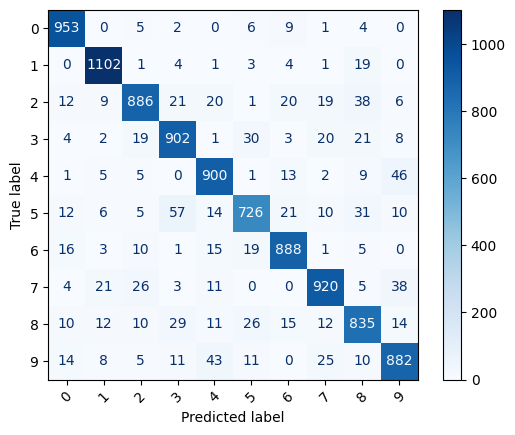

In [30]:
print("model_2b")
visualize_misclassified(model_2b, x_test, y_test)
confusion_matrix_generator(model_2b)

The confusion matrix shows that the model has missed a few predicted, but in general, it's decent. However, it has missed a bit more of fives, maybe it could be something related to the explanation said above about model 2a, but very unlikely. And the miss classified images shows that it has missed some easy and some hard patterns, so it's hard to tell only based on those how general it really is.

model_2c
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


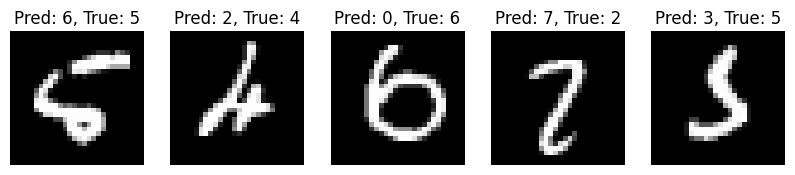

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step


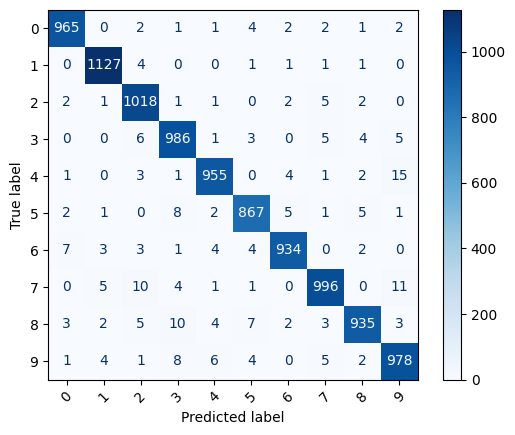

In [31]:
print("model_2c")
visualize_misclassified(model_2c, x_test, y_test)
confusion_matrix_generator(model_2c)

As the confusion matrix suggests, this model performs very well and makes only a few mistakes. Moreover, the misclassified images are notably challenging, with the exception of 6.

model_2d
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


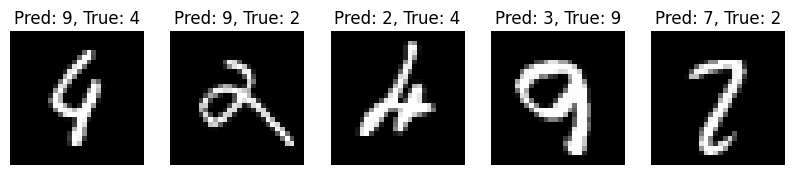

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step


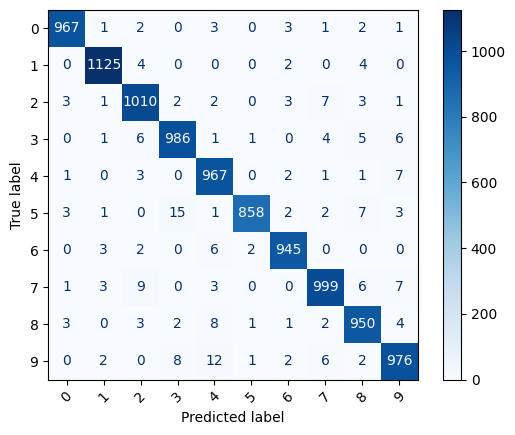

In [32]:
print("model_2d")
visualize_misclassified(model_2d, x_test, y_test)
confusion_matrix_generator(model_2d)

As the confusion matrix suggests, this model performs very well and makes only a few mistakes. However, some of the miss classified images are not too difficult, for example 4 and 9. Therefore, it could be reviewed other miss classified images to make sure if it's common. Although, it's very unlikely, since the confusion matrix shows that it is missing very few.

(5 is the least predicted, but it's now similar to the rest of the numbers, so it's difficult to notice any patterns)

model_2e_1
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


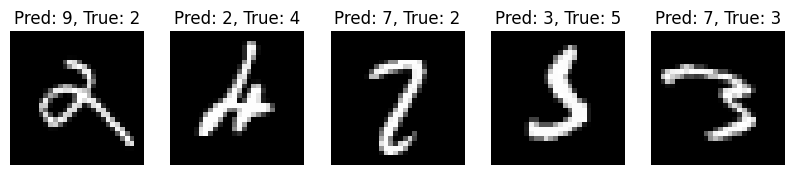

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step


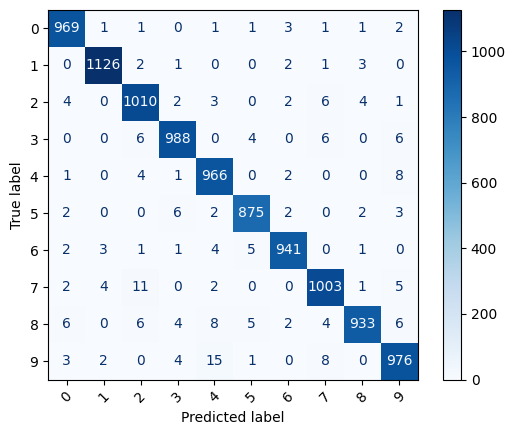

In [33]:
print("model_2e_1")
visualize_misclassified(model_2e_1, x_test, y_test)
confusion_matrix_generator(model_2e_1)

As the confusion matrix suggests, this model performs very well and makes only a few mistakes. Moreover, the miss classified images are difficult, I would be able to distinguish all of them, except 7 (I would have guessed 2 too) and 5 would be difficult for me.

(5 is the least predicted again, but it's now similar to the rest of the numbers, so it's difficult to notice any patterns)

model_2e_2
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


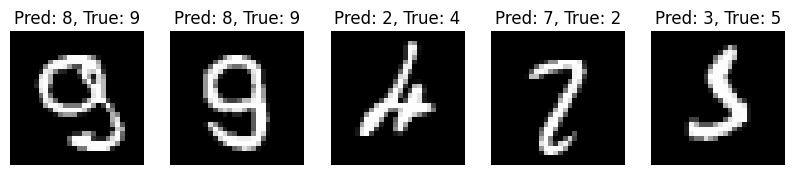

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step


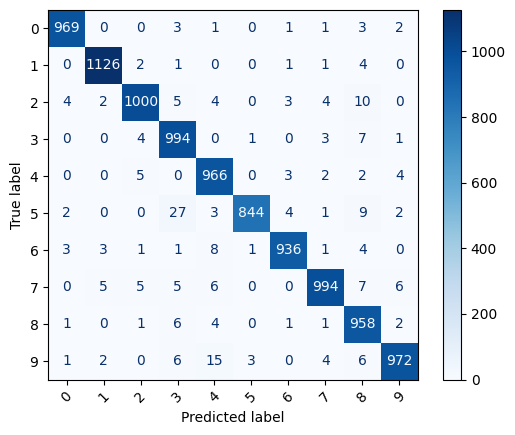

In [34]:
print("model_2e_2")
visualize_misclassified(model_2e_2, x_test, y_test)
confusion_matrix_generator(model_2e_2)

As the confusion matrix suggests, this model performs very well and makes only a few mistakes. However, some of the miss classified images are not too difficult, for example the two 9s. Therefore, it could be reviewed other miss classified images to make sure if it's common. Although, it's very unlikely, since the confusion matrix shows that it is missing very few.

(5 is the least predicted AGAIN, but it's now similar to the rest of the numbers, so it's difficult to notice any patterns)